# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.linear_model import LinearRegression # to build linear regression_model
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.metrics import mean_squared_error  # to check model performance

### Load the dataset

In [17]:
df = pd.read_csv("./datasets/boston.csv")

### Check the shape of the dataset

In [18]:
print(f'No of rows is {df.shape[0]} and columns is {df.shape[1]}')

No of rows is 506 and columns is 13


### Get the info regarding column datatypes

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Get summary statistics for the numerical columns

In [20]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,37.97,50.00


In [21]:
# count the unique values in each column
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NX          81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

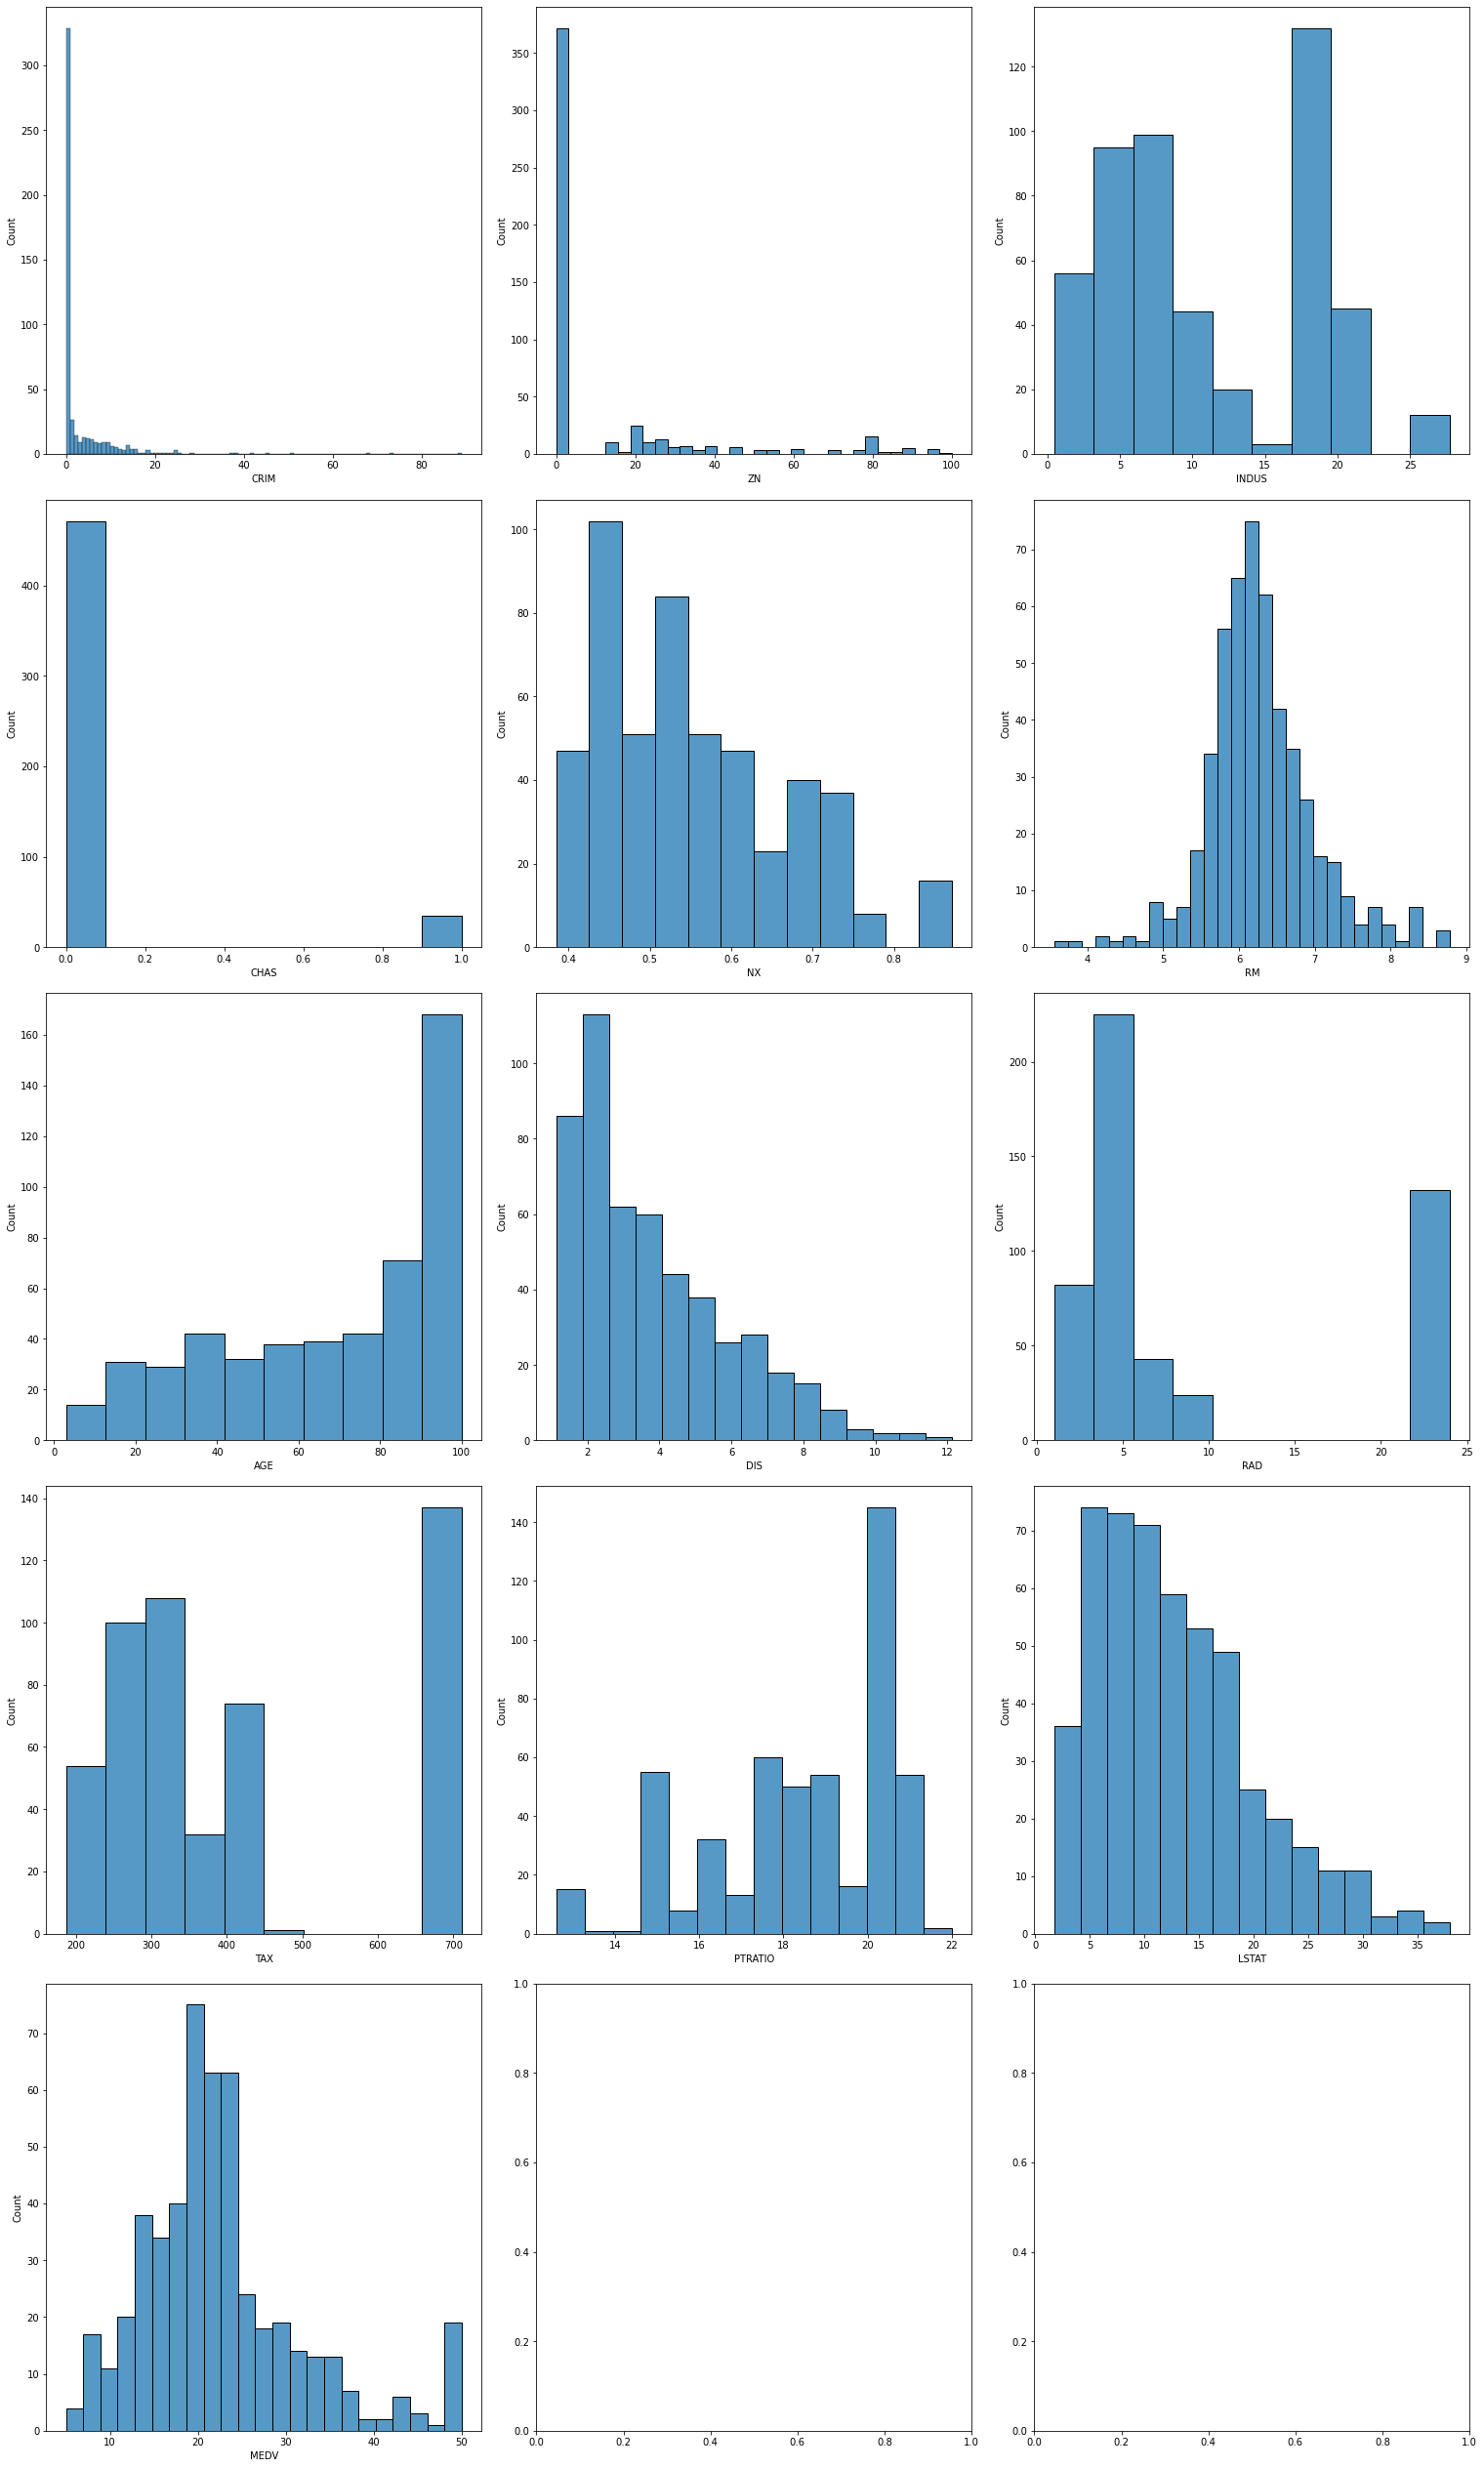

In [22]:
# Plot the hist plot to check for skewness in the distribution
def plotHistogram(variables, total_cols):
    num_plots = len(variables)
    total_rows = num_plots//total_cols + 1

    fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)

    for index, var in enumerate(variables):
        row = index//total_cols
        pos = index % total_cols
        sns.histplot(x=var, data=df, ax=axs[row][pos]) 


# Call the method
plotHistogram(df.columns, 3)

CRIM and ZN have heavily skewed distributions

RM and MEDV have close to normal distributions

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

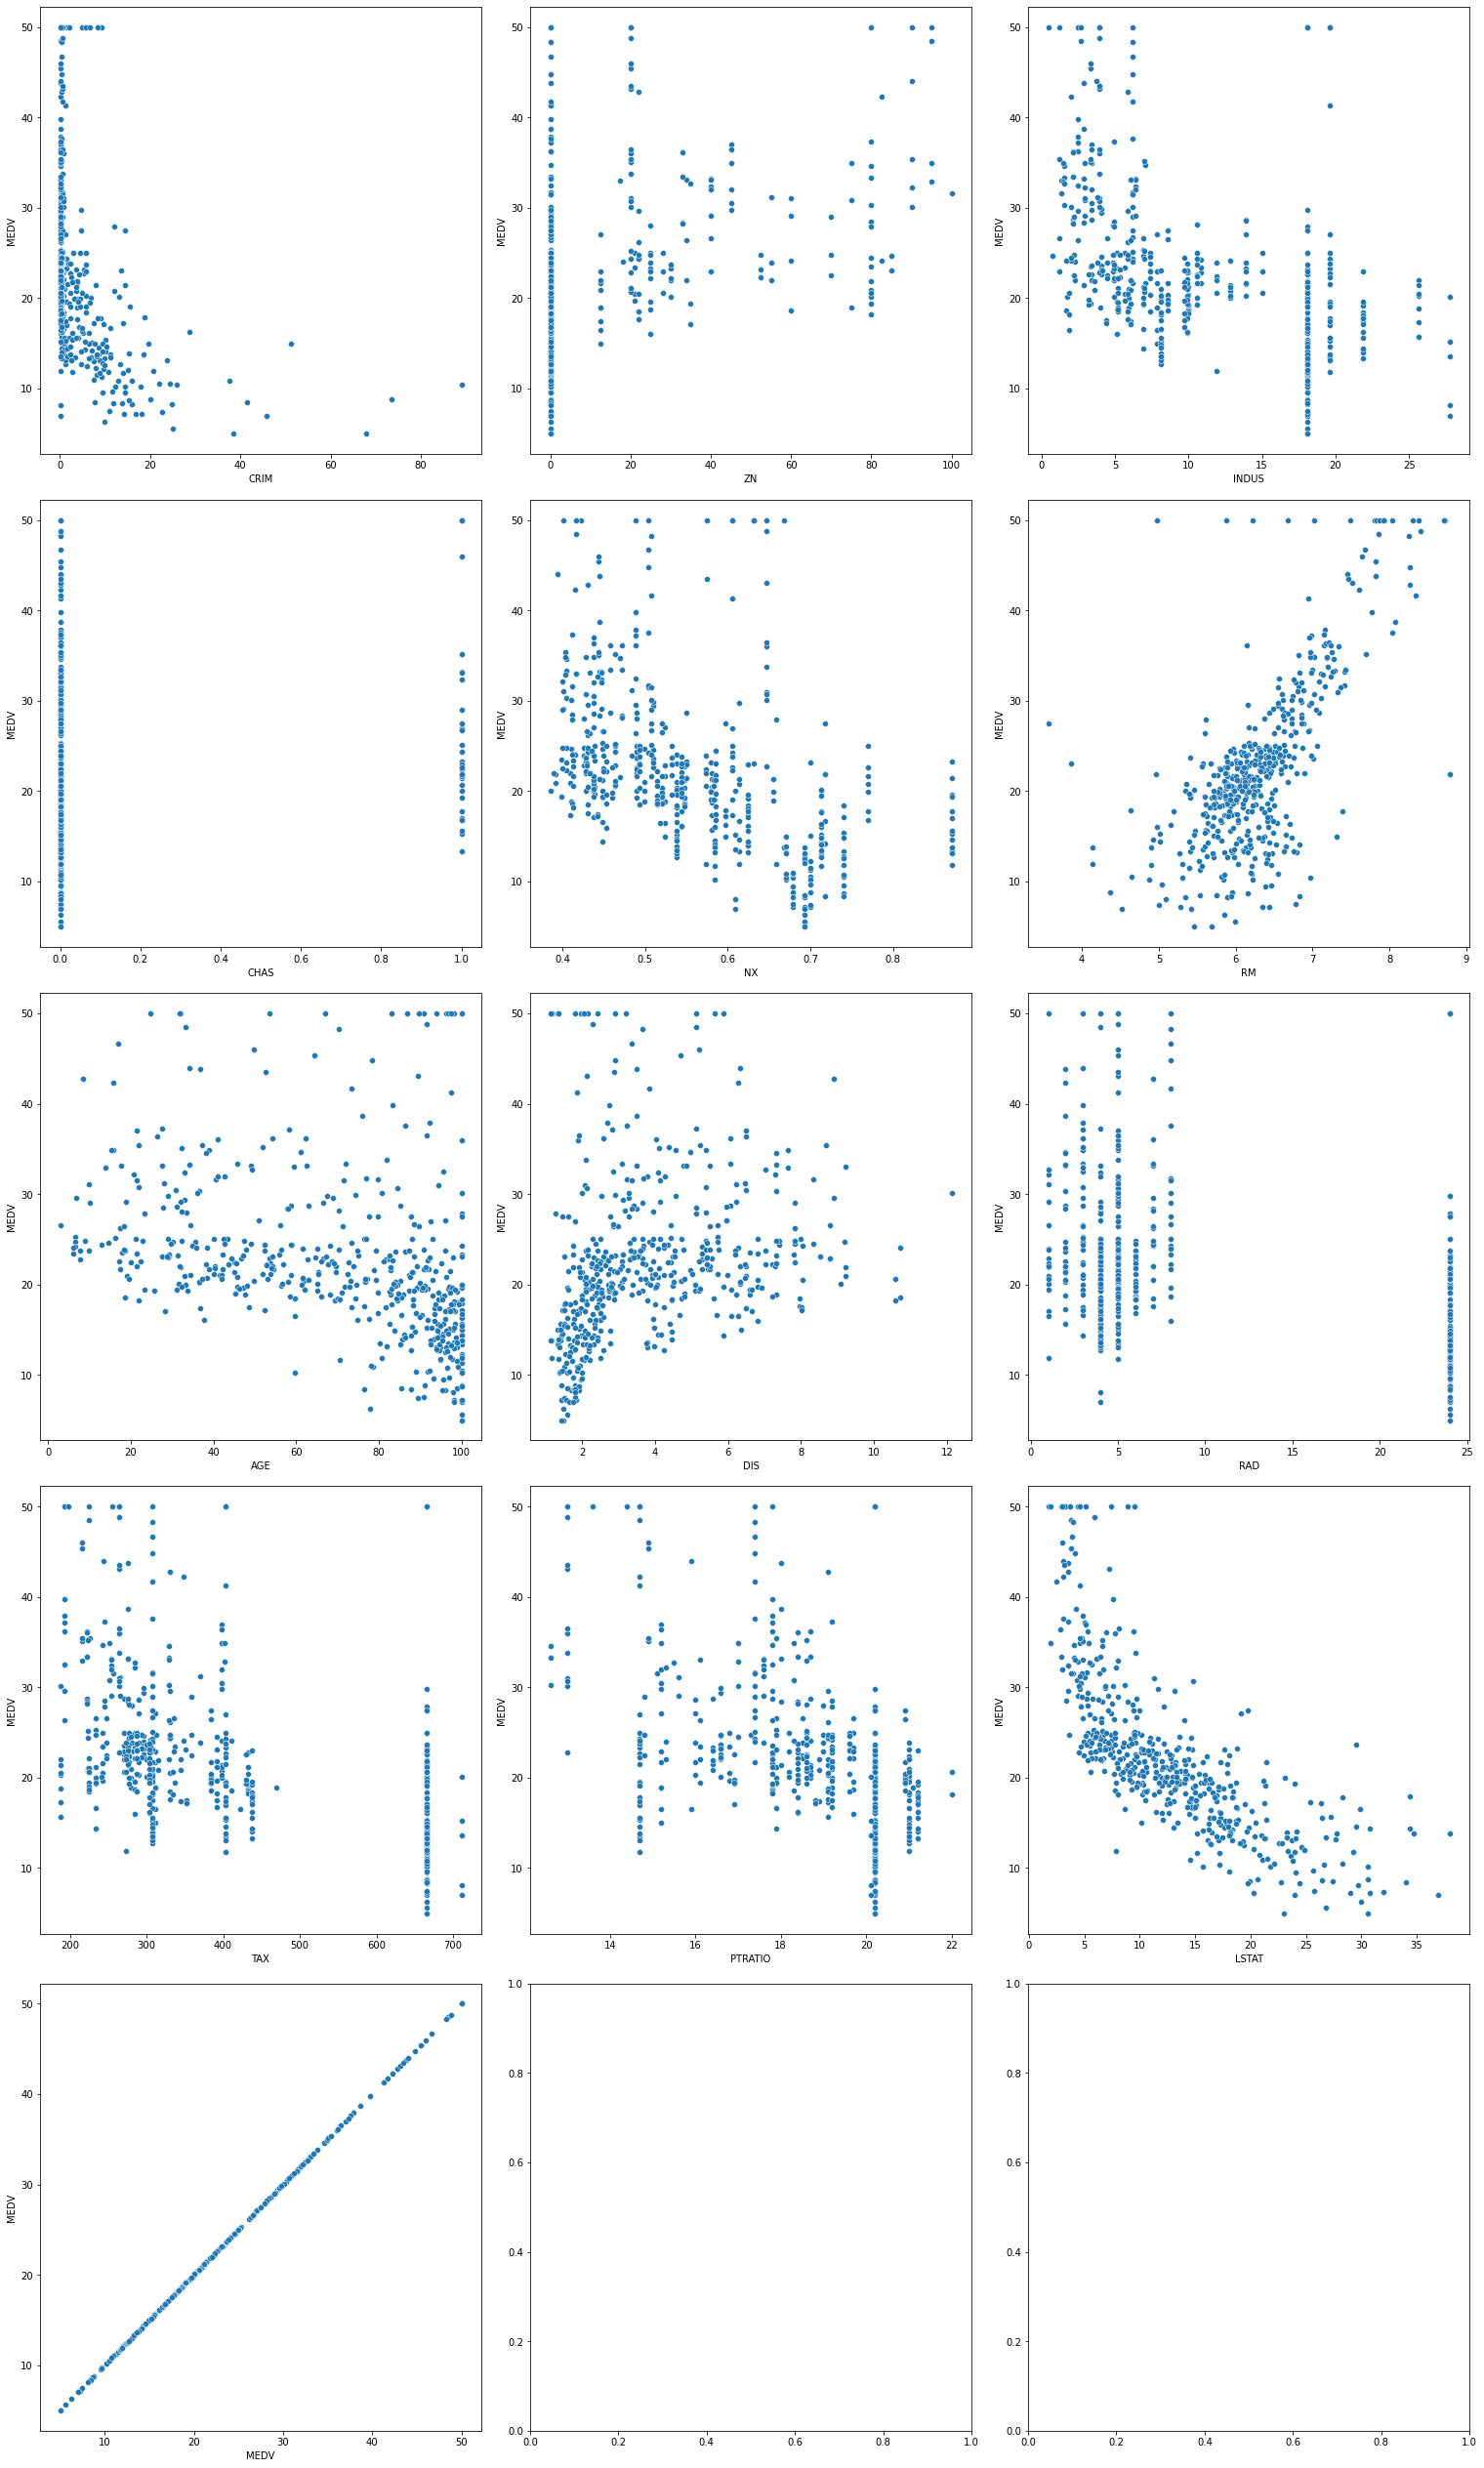

In [23]:
# Plot the hist plot to check for skewness in the distribution
def plotScatterPlot(variables, total_cols):
    num_plots = len(variables)
    total_rows = num_plots//total_cols + 1

    fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)

    for index, var in enumerate(variables):
        row = index//total_cols
        pos = index % total_cols
        sns.scatterplot(x=var, y="MEDV", data=df, ax=axs[row][pos]) 


# Call the method
plotScatterPlot(df.columns, 3)

LSTAT, RM show a slightly strong linear relationship with MEDV

**Plot the correlation heatmap and list your observations.**

<AxesSubplot:>

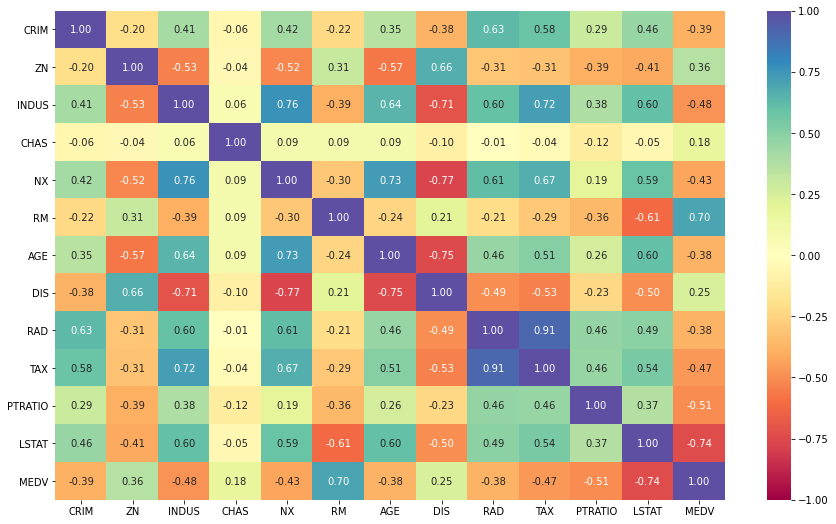

In [24]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

- NX and TAX show slightly strong positive linear relationship with INDUS while DIS shows slightly strong negative linear relationship with INDUS
- NX shows a slightly strong positive linear relationship with AGE while DIS shows a slightly strong negative linear relationship with AGE
- RM has a strong positive linear relationship with MEDV while LSTAT has a slightly strong negative linear relationship with MEDV
- DIS shows slightly stronger negative relationship with NX
- RAD has very strong relationship with TAX

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [25]:
# Independent Variables
X = df.drop(['MEDV'], axis=1)

# Dependent Variable
Y = df['MEDV']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [26]:
print(f'The training data has {X_train.shape[0]} rows while test data has {X_test.shape[0]} rows')

The training data has 354 rows while test data has 152 rows


In [27]:
print(f'The training data has {Y_train.shape[0]} rows while test data has {Y_test.shape[0]} rows')

The training data has 354 rows while test data has 152 rows


### Model Building (sklearn)

**Fit the model to the training set**

In [28]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

**Get the score on training set**

In [29]:
regression_model.score(X_train, Y_train)

0.707373205885618

**Write your own function for the R-squared score.**

In [30]:
def r_squared(model, x, y):
    y_bar = y.mean()
    SST = ((y - y_bar) ** 2).sum()
    SSR = ((model.predict(x) - y_bar) ** 2).sum()
    R_squared = SSR / SST
    return SSR,SST,R_squared

SSR, SST, R_squared = r_squared(regression_model, X_train, Y_train)
print("SSR: ", SSR)
print("SST: ", SST)
print("R-squared: ", R_squared)

SSR:  20330.562655243037
SST:  28740.928389830508
R-squared:  0.707373205885606


**Get the score on test set**

In [31]:
regression_model.score(X_test, Y_test)

0.7721684899134132

**Get the RMSE on test set**

In [32]:
np.sqrt(mean_squared_error(Y_test,regression_model.predict(X_test)))

4.569658652745827

**Get the model coefficients.**

In [33]:
regression_model.fit(X_train, Y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for CRIM is -0.11384484836914226
The coefficient for ZN is 0.061170268040606726
The coefficient for INDUS is 0.0541034649587423
The coefficient for CHAS is 2.517511959122686
The coefficient for NX is -22.248502345084425
The coefficient for RM is 2.6984128200099033
The coefficient for AGE is 0.004836047284751289
The coefficient for DIS is -1.5342953819992617
The coefficient for RAD is 0.2988332548590185
The coefficient for TAX is -0.011413580552025194
The coefficient for PTRATIO is -0.9889146257039411
The coefficient for LSTAT is -0.5861328508499092


**Automate the equation of the fit**

In [34]:
equation = ["Price = "]
for idx, col_name in enumerate(X_train.columns):
    equation.append(str(regression_model.coef_[idx]))
    equation.append(" * " + col_name + " + ")
    
equation.append(str(regression_model.intercept_))

print(''.join(equation))

Price = -0.11384484836914226 * CRIM + 0.061170268040606726 * ZN + 0.0541034649587423 * INDUS + 2.517511959122686 * CHAS + -22.248502345084425 * NX + 2.6984128200099033 * RM + 0.004836047284751289 * AGE + -1.5342953819992617 * DIS + 0.2988332548590185 * RAD + -0.011413580552025194 * TAX + -0.9889146257039411 * PTRATIO + -0.5861328508499092 * LSTAT + 49.88523466381753
